## Простая регрессионная модель

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston


ds_boston = load_boston()
df = pd.DataFrame(ds_boston.data, columns = ds_boston.feature_names)
df['MEDV'] = ds_boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
print(ds_boston.DESCR[:1350])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

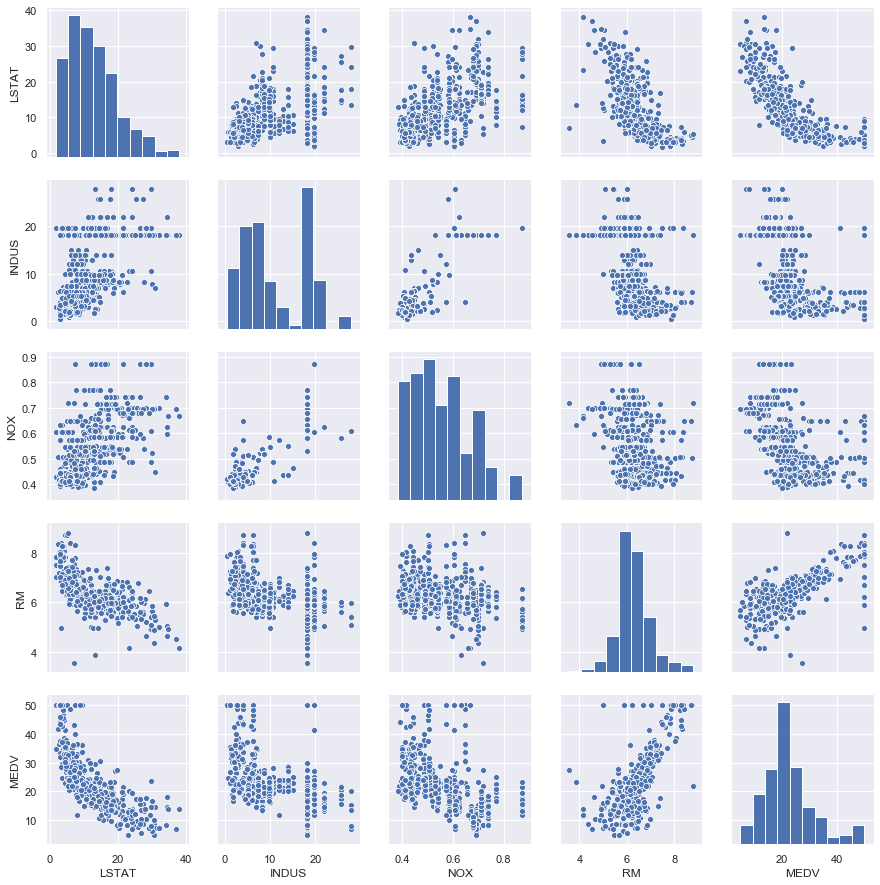

In [3]:
sns.set(style='darkgrid')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)

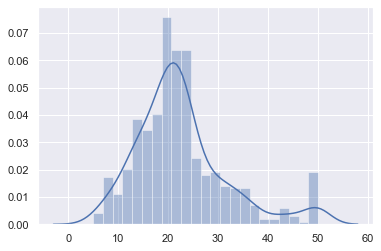

In [4]:
sns.distplot(ds_boston.target)

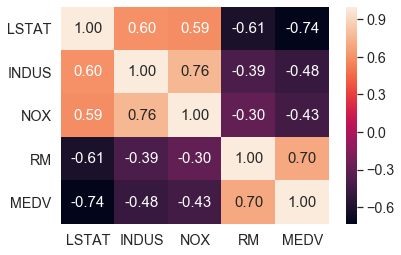

In [5]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.3)
hm = sns.heatmap(cm,
                 annot=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

Переменная MEDV сильнее всего коррелирует с LSTAT и RM. \
Разведочный анализ показал, что связь между MEDV и LSTAT имеет нелинейный характер.

Text(0, 0.5, 'Цена, тыс. долл. (MEDV)')

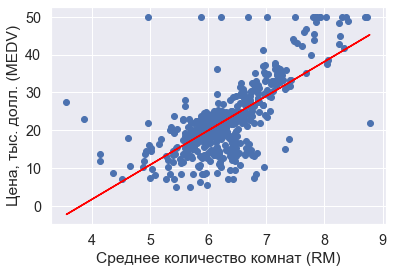

In [6]:
from sklearn.linear_model import LinearRegression


X = df[['RM']].values
y = df['MEDV'].values
lr = LinearRegression()
lr.fit(X, y)
plt.scatter(X, y)
plt.plot(X, lr.predict(X), c='red')
plt.xlabel('Среднее количество комнат (RМ)')
plt.ylabel ('Цена, тыс. долл. (MEDV)')

In [7]:
print('k (наклон): %.2f' % lr.coef_[0])
print('b (пересечение): %.2f' % lr.intercept_)

k (наклон): 9.10
b (пересечение): -34.67


In [8]:
print('Цена 7-комнатной квартиры, тыс. долл.: %.3f' % lr.predict([[7]]))

Цена 7-комнатной квартиры, тыс. долл.: 29.044


## Модели регуляризованной регрессии

In [9]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


inst = {'Ridge': Ridge(alpha=1), 
        'Lasso': Lasso(alpha=1), 
        'ElasticNet': ElasticNet(alpha=1, l1_ratio=0.8)}
for m, i in inst.items():
    i.fit(X, y)
    y_pred = i.predict(X)
    print(m)
    print('Haклoн: %.2f' % i.coef_[0], 
          ' Пересечение: %.2f' % i.intercept_, 
          ' MSE: %.2f' % mean_squared_error(y, y_pred),
          ' R^2: %.3f' % r2_score(y, y_pred))
    print('-'*55)

Ridge
Haклoн: 9.07  Пересечение: -34.44  MSE: 43.60  R^2: 0.484
-------------------------------------------------------
Lasso
Haклoн: 7.07  Пересечение: -21.91  MSE: 45.63  R^2: 0.459
-------------------------------------------------------
ElasticNet
Haклoн: 5.32  Пересечение: -10.90  MSE: 50.65  R^2: 0.400
-------------------------------------------------------


## Множественная регрессионная модель

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
print('MSE train_data: %.2f, test_data: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train_data: %.3f, test_data: %.3f' % 
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

MSE train_data: 19.96, test_data: 27.20
R^2 train_data: 0.765, test_data: 0.673


## Полиномиальная регрессия (в сравнении с линейной)

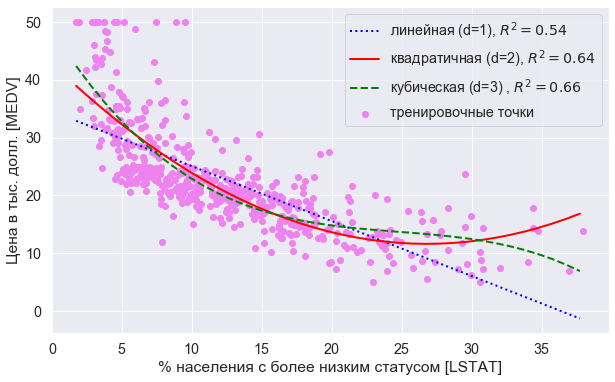

In [11]:
from sklearn.preprocessing import PolynomialFeatures


X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

# полиномиальные признаки
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.figure(figsize=(10,6))
plt.scatter(X, y, 
            label='тренировочные точки', 
            color='violet')
plt.plot(X_fit, y_lin_fit, 
         label='линейная (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle= ':')
plt.plot(X_fit, y_quad_fit, 
         label='квадратичная (d=2), $R^2=%.2f$' % quadratic_r2, 
         color='red', 
         lw=2, 
         linestyle='-')
plt.plot(X_fit, y_cubic_fit,
         label= 'кубическая (d=3) , $R^2= %.2f$ '% cubic_r2,
         color='green',
         lw=2,
         linestyle='--')
plt.xlabel('% населения с более низким статусом [LSTAT]')
plt.ylabel('Цена в тыс. долл. [MEDV]')
plt.legend(loc='upper right')
plt.show()